# Car Insurance Risk Analysis Plan

## Introduction

In the modern car insurance industry, car insurance premium prices seem somewhat of a mystery. The aim of this analysis project is to create a predictive model for car insurance prices. Although machine learning may already be at play in the insurance industry, this analysis will leverage machine learning techniques to indentify any patterns that may influence insurance costs and help insurers offer fair pricing for drivers.

In [234]:
# Import essentials

import pandas as pd     
import numpy as np      
import matplotlib.pyplot as plt     # for plots
import seaborn as sns               # for stats visualisation
import itertools
import math

Load the data from car_insurance.csv and display the first few lines to make sure it has imported and if being stored correctly by pandas.

In [235]:
# Load data w pandas
insurance_data = pd.read_csv('car_insurance.csv')

# Display first few rows of data
insurance_data.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


Check for missing values. If there are none, skip the step of filling with mean or median values.

In [236]:
# Check for any missing values in the df
insurance_data.isnull().sum()

Driver Age                   0
Driver Experience            0
Previous Accidents           0
Annual Mileage (x1000 km)    0
Car Manufacturing Year       0
Car Age                      0
Insurance Premium ($)        0
dtype: int64

Check for any strings and convert them if there are any.

In [237]:
# Check data types in the df
insurance_data.dtypes

Driver Age                     int64
Driver Experience              int64
Previous Accidents             int64
Annual Mileage (x1000 km)      int64
Car Manufacturing Year         int64
Car Age                        int64
Insurance Premium ($)        float64
dtype: object

In [238]:
# Show summary statistics of the df with describe

insurance_data.describe()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.575000,14.759000,2.5680,17.933000,2007.637000,17.363000,493.742250
std,13.765677,10.544292,1.6989,4.410665,10.363331,10.363331,5.909689
min,18.000000,0.000000,0.0000,11.000000,1990.000000,0.000000,477.050000
25%,30.000000,6.000000,1.0000,14.000000,1999.000000,8.000000,489.487500
50%,42.000000,13.000000,3.0000,18.000000,2008.000000,17.000000,493.950000
75%,53.000000,23.000000,4.0000,22.000000,2017.000000,26.000000,498.312500
max,65.000000,40.000000,5.0000,25.000000,2025.000000,35.000000,508.150000


Scale the values of the dataframe

In [239]:
from sklearn.preprocessing import minmax_scale
insurance_data_scaled = minmax_scale(insurance_data)

Plot some box plots after scaling to get a better readability on any outliers.

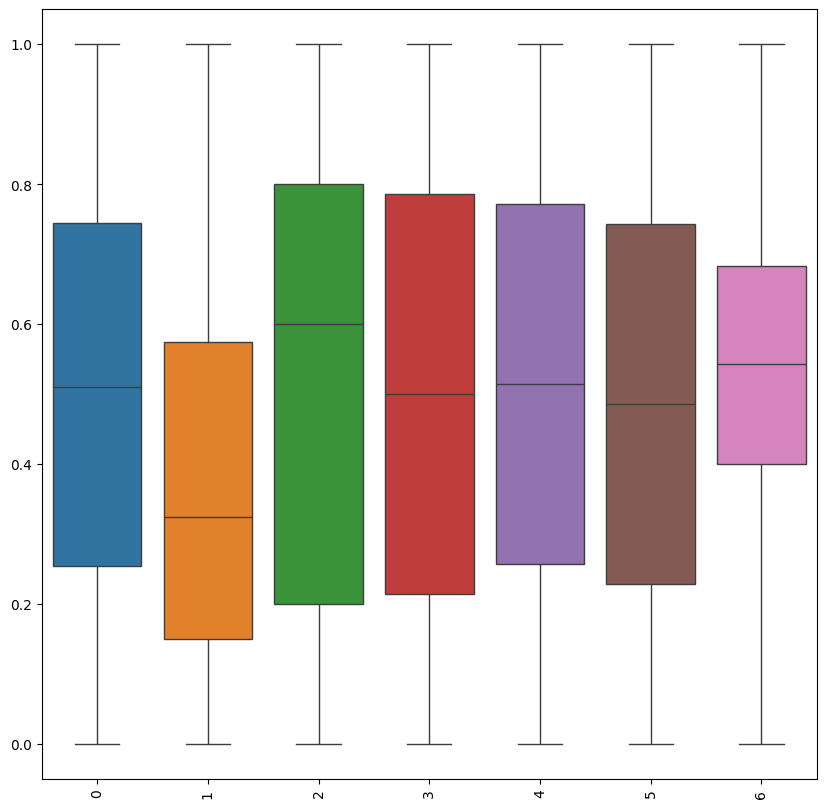

In [240]:
# Set figure size to a square
plt.figure(figsize=(10, 10))

# Create a boxplot
sns.boxplot(data=insurance_data_scaled)

# Rotate x-axis labels for clarity (Wasn't readable otherwise)
plt.xticks(rotation=90)


plt.show()

The boxplots show that value wise, the "Car Manufacturing Year" is an outlier due to the nature of the year being in the thousands.

Use a heatmap to visualise the relationship between each variable and pinpoint any areas worth investigating further.

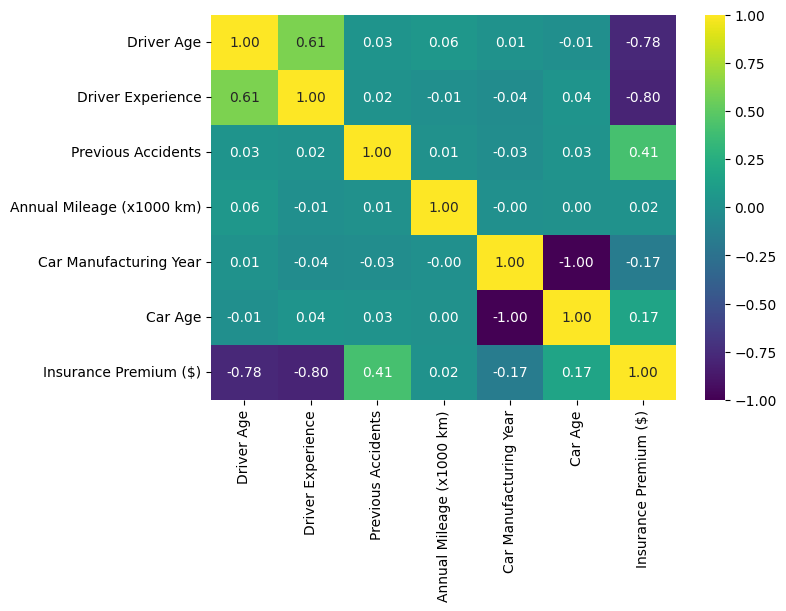

In [241]:
# Use seaborn to create a heatmap of the correlation matrix

insurance_data_scaled = pd.DataFrame(insurance_data_scaled,columns = insurance_data.columns)

# Set figure size
plt.figure(figsize=(7.5, 5))

# Generate the heatmap
sns.heatmap(insurance_data_scaled.corr(), annot=True, cmap="viridis", fmt=".2f")

# Show the plot
plt.show()


The heatmap generated some strong correlations in specific areas.
There is already some clear corelation between insurance premiums and other factors.
Most notable are the -0.78 corelation between insurance premiums and driver age. Also, the -0.80 correlation between driver experience and insurance premium. The corealtion with insurance premiums and previous accidents is also interesting at 0.41.

# Areas for Further Investigation

### 1. The impact of the driver experience and age on premium prediction
Both driver experience and age exhibit a strong negative correlation with insurance premiums, it stands out as a main task to assess whether this handful of factors can predict insurance premiums accurately, without the need for other factors. Regression algorithms can be used to show to scale of their impact to see whether premiums decline at a constant rate.

### 2. Accident History effect on insurance premiums
The +0.41 corelation between previous accidents and premium costs does suggest there is a significant relationship, however further analysis is required in order to determine if the relationship between these factors is linear or exponential. Categorising drivers into risk groups, such as low/high or medium risk, using the accident history may be neccessary to compare premiums between categories.

### 3. Clustering Drivers into Risk Groups
It may be useful to apply clustering techniques such as hierarchical clustering or K-Means in order to categorise drivers into distinctive risk categories. This may assist our analysis by allowing our models to group charectoristics. Features that may be used for clustering could be: Experience, Annual Mileage, Previous Accidents or Age. 

### 4. Vehicle Age Analysis
The age of the vehicle seems to show a relatively weak relationship with the insurance premiums. However, further analysis may be beneficial to discover whether there is a certain threshold for vehicle age that may alter the premium pricing, for example; when a vehicle gets to 25 years old, does the insurance premium have a sudden drop?


# Impact of driver age on insurance premiums

# Regressions Algorithms

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [243]:
insurance_data.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


In [244]:
# Select relevant collumns from the data
X = insurance_data[['Driver Age']]
y = insurance_data[['Insurance Premium ($)']]

In [245]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [246]:
# Select linear regression model and fit the data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [247]:
# Predict on the test set
y_pred = model.predict(X_test)

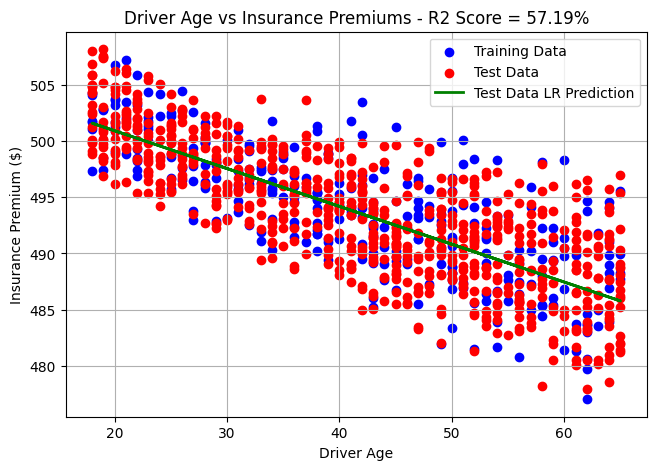

In [248]:
# Plot the results and display
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)

plt.figure(figsize=(7.5,5))
plt.scatter(X_test, y_test, color='blue', label='Training Data')
plt.scatter(X_train, y_train, color='red', label='Test Data')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Test Data LR Prediction')
plt.xlabel("Driver Age")
plt.ylabel("Insurance Premium ($)")
plt.title(f"Driver Age vs Insurance Premiums - R2 Score = {r2*100:.2f}%")
plt.grid(True)
plt.legend()
plt.show()

R2 score is very low due to random noise due to the real world nature of the data.

y = Wx+b +\epsilon

# Unsupervised Learning

## KMeans Clustering

I will be using KMeans to cluster the drivers into risk groups.

In [249]:
# Imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [250]:
# Select features to use in clustering
features = insurance_data[[
    'Driver Age',
    'Driver Experience',
    'Previous Accidents',
    'Annual Mileage (x1000 km)'
]]

In [251]:
# Standardise feature values
scaled_features = scaler.fit_transform(features)

In [252]:
# Run KMeans clustering with n clusters
n = 4
kmeans = KMeans(n_clusters=n, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to DF
insurance_data['Driver Risk Cluster'] = clusters

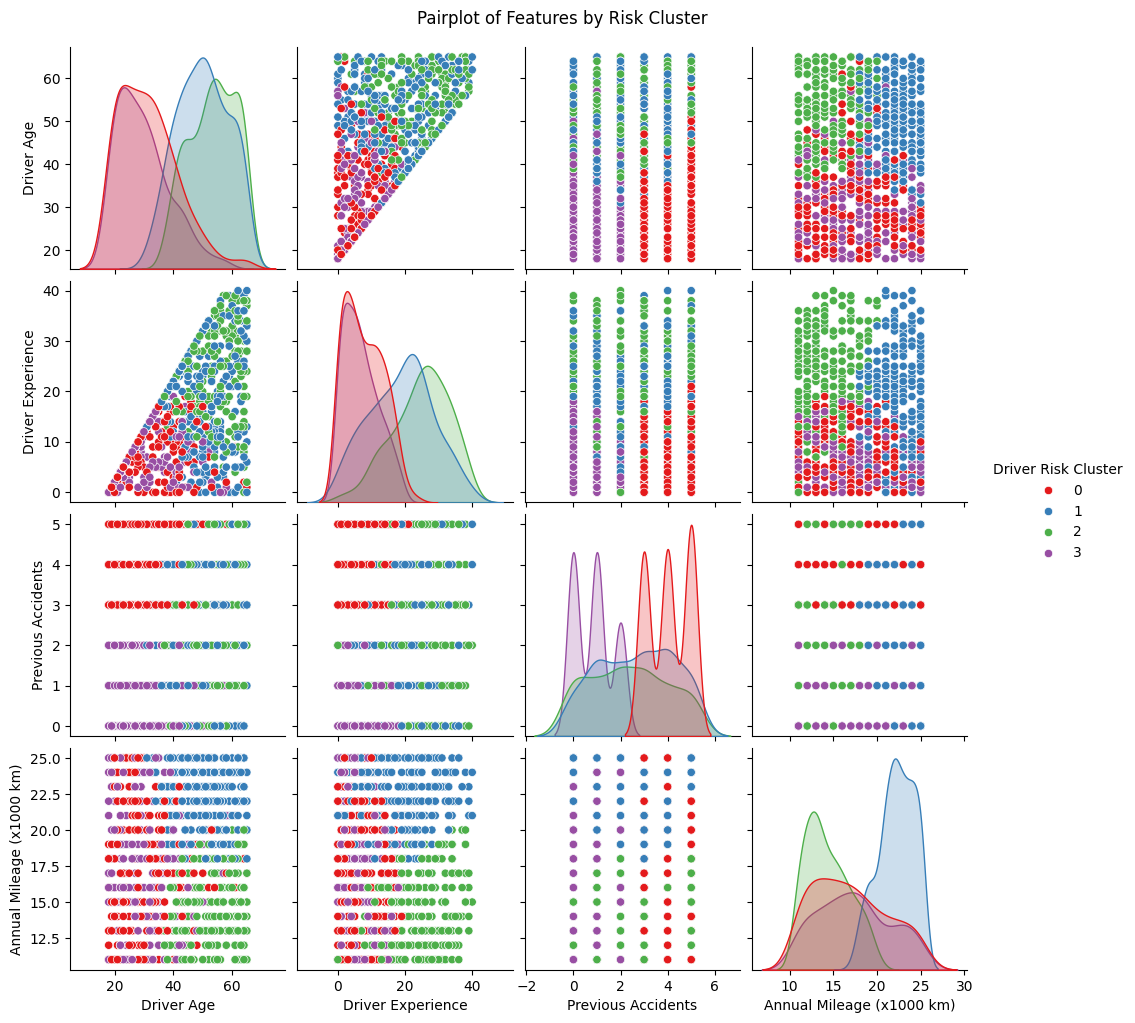

In [253]:
sns.pairplot(insurance_data, vars=[
    'Driver Age', 'Driver Experience', 'Previous Accidents', 'Annual Mileage (x1000 km)'
], hue='Driver Risk Cluster', palette='Set1')
plt.suptitle('Pairplot of Features by Risk Cluster', y=1.02)
plt.show()

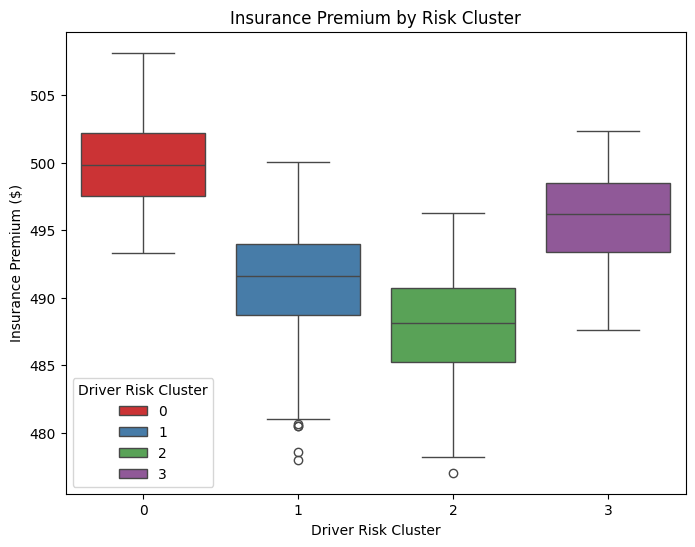

In [254]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Driver Risk Cluster', y='Insurance Premium ($)', data=insurance_data, palette='Set1', hue='Driver Risk Cluster')
plt.title('Insurance Premium by Risk Cluster')
plt.show()

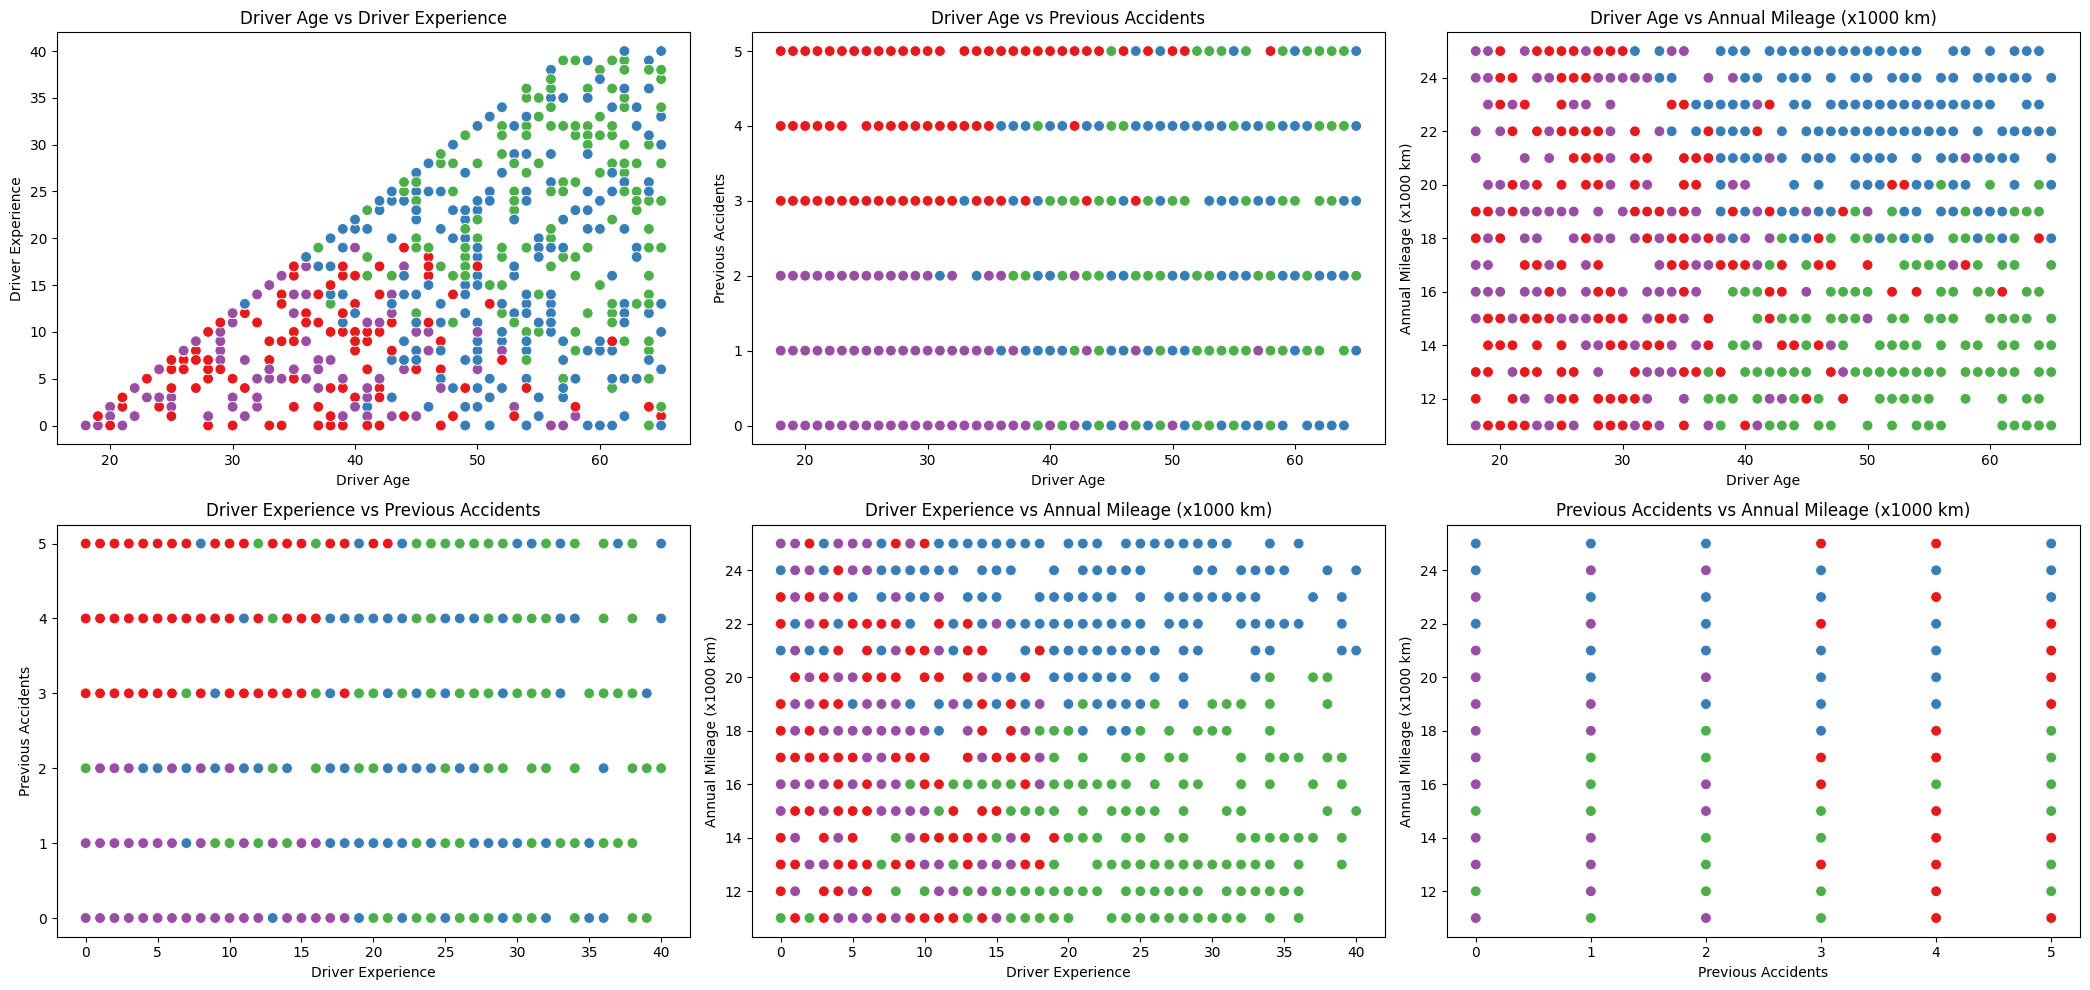

In [255]:
# Plot all possible combinations of to cluster driver risk

features = [
    'Driver Age',
    'Driver Experience',
    'Previous Accidents',
    'Annual Mileage (x1000 km)'
]

feature_pairs = list(itertools.combinations(features, 2))
n_pairs = len(feature_pairs)
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(n_pairs / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*7, n_rows*5))
axes = axes.flatten()  # Flatten in case of single row

for ax, (x_feat, y_feat) in zip(axes, feature_pairs):
    sns.scatterplot(
        x=x_feat, y=y_feat,
        hue='Driver Risk Cluster',
        palette='Set1',
        data=insurance_data,
        s=60,
        ax=ax,
        legend=False  # We'll add a single legend later
    )
    ax.set_title(f'{x_feat} vs {y_feat}')
    ax.set_xlabel(x_feat)
    ax.set_ylabel(y_feat)

# Remove any unused subplots
for i in range(len(feature_pairs), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Elbow Method to find optimal K for K Means

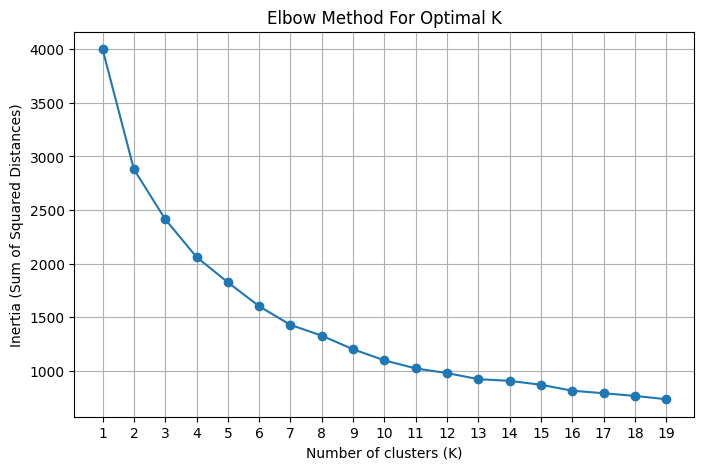

In [256]:
inertia = []
K_range = range(1, 20)  # Try K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)  # Use your scaled features
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## Silouette Score to find Optimal K

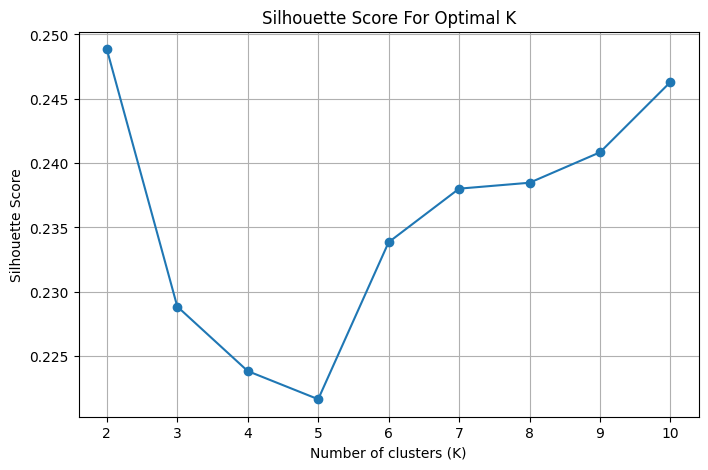

In [257]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)  # Silhouette score is not defined for K=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## Hierarchical Clustering (Agglomerative)

In [258]:
from sklearn.cluster import AgglomerativeClustering

In [259]:
# Select all numerical columns in data except the target data (Insurance premium)
numerical_features = insurance_data.select_dtypes(include=['number']).columns.tolist()

# Remove target
if 'Insurance Premium ($)' in numerical_features:
    numerical_features.remove('Insurance Premium ($)')

X = insurance_data[numerical_features]

In [260]:
# Standardise the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [261]:
# Perform Agglomerative clustering

n = 10 # Number of clusters
agglo = AgglomerativeClustering(n_clusters=n)
clusters = agglo.fit_predict(X_scaled)
insurance_data['Agglo Cluster'] = clusters

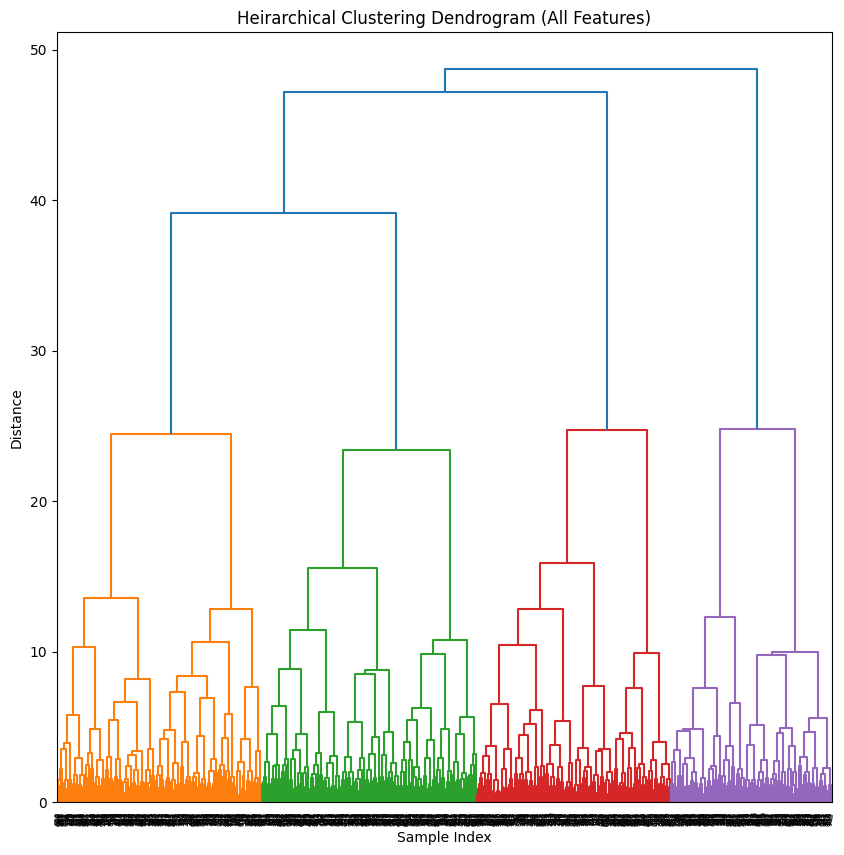

In [262]:
# Plot the Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10,10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Heirarchical Clustering Dendrogram (All Features)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

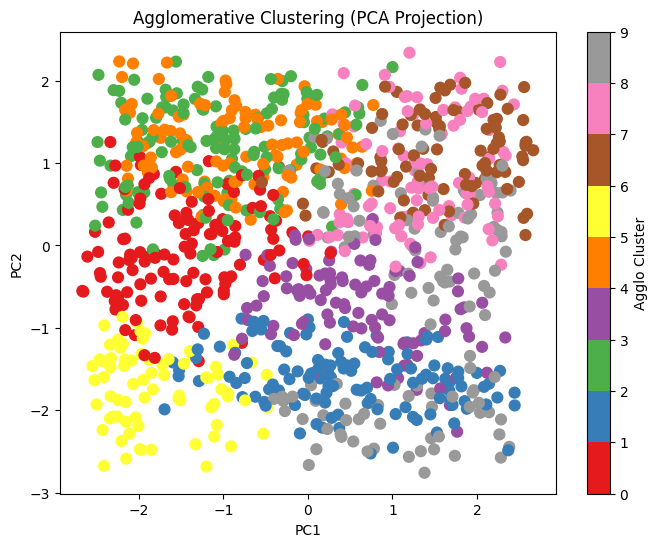

In [263]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='Set1', s=60)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering (PCA Projection)')
plt.colorbar(label='Agglo Cluster')
plt.show()

# Multivariate Linear Regression

In [264]:
insurance_data.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($),Driver Risk Cluster,Agglo Cluster
0,56,32,4,17,2002,23,488.35,2,2
1,46,19,0,21,2025,0,486.15,1,9
2,32,11,4,15,2020,5,497.55,0,1
3,60,0,4,19,1991,34,498.35,1,0
4,25,7,0,13,2005,20,495.55,3,4


In [265]:
X = insurance_data.drop(columns="Insurance Premium ($)")
y = insurance_data["Insurance Premium ($)"]

In [266]:
X.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Driver Risk Cluster,Agglo Cluster
0,56,32,4,17,2002,23,2,2
1,46,19,0,21,2025,0,1,9
2,32,11,4,15,2020,5,0,1
3,60,0,4,19,1991,34,1,0
4,25,7,0,13,2005,20,3,4


In [267]:
y.head()

0    488.35
1    486.15
2    497.55
3    498.35
4    495.55
Name: Insurance Premium ($), dtype: float64

In [268]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [269]:
# Select linear regression model and fit the data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [270]:
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(300, 8) (300,)
(700, 8) (700,)


In [271]:
y_pred = model.predict(X_test)

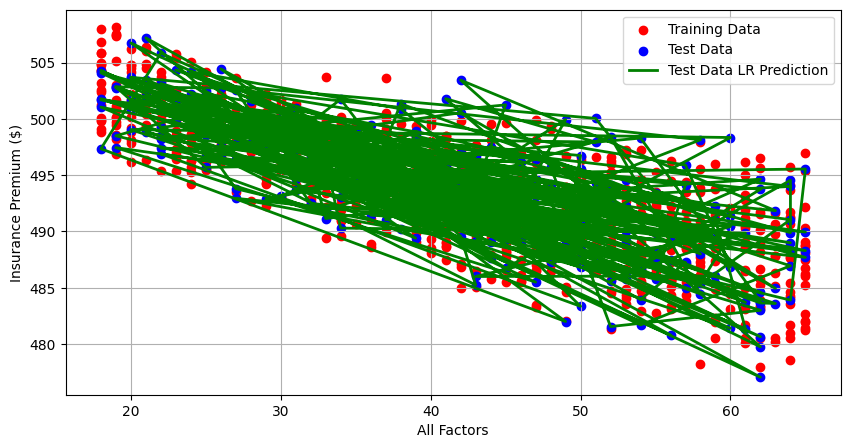

In [272]:
# Plot the results and display

plt.figure(figsize=(10,5))
plt.scatter(X_train.iloc[:, 0], y_train, color='red', label='Training Data')
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Test Data')
plt.plot(X_test.iloc[:, 0], y_pred, color='green', linewidth=2, label='Test Data LR Prediction')
plt.xlabel("All Factors")
plt.ylabel("Insurance Premium ($)")
plt.grid(True)
plt.legend()
plt.show()

In [273]:
r2 = r2_score(y_test,y_pred)

print(r2)

1.0


In [274]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(mse)

5.277584637382598e-27


In [275]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
 7   Driver Risk Cluster        1000 non-null   int32  
 8   Agglo Cluster              1000 non-null   int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 66.5 KB


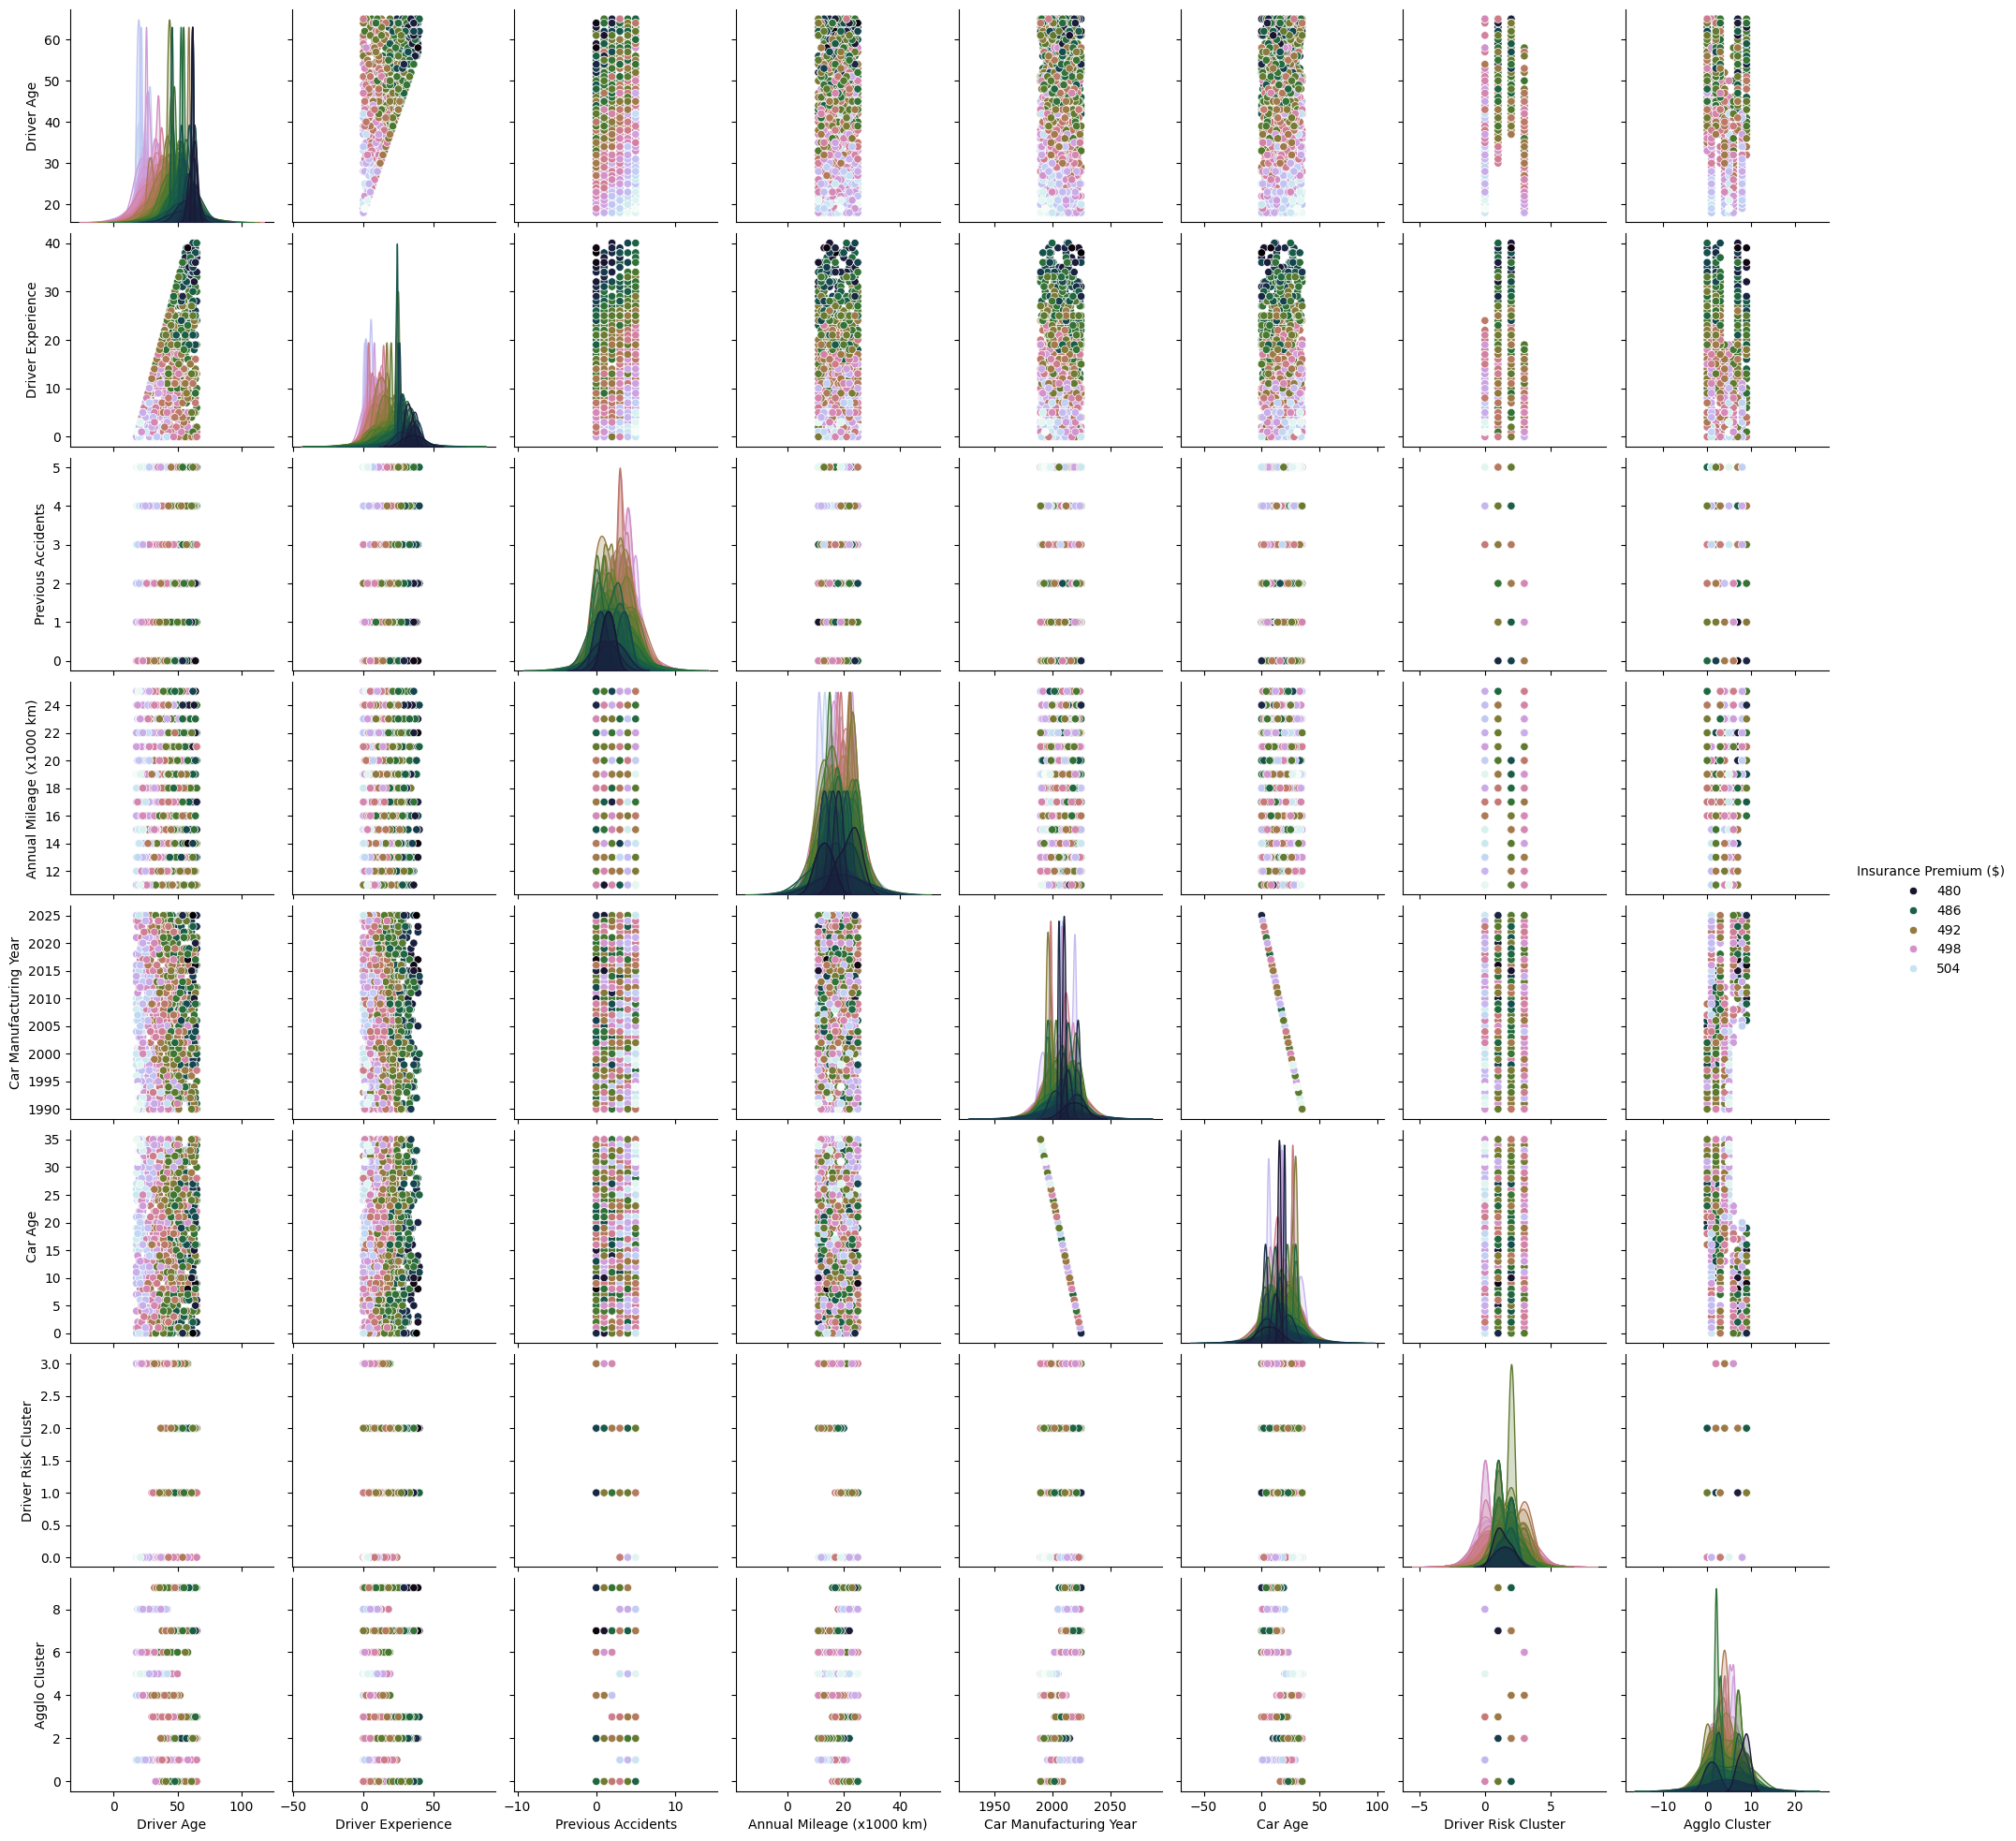

In [276]:
sns.pairplot(insurance_data, hue='Insurance Premium ($)', palette='cubehelix')